In [ ]:
#Import de archivos y librerias

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../data/Datos_Jugadores_2024-2025.csv")

print(list(df['Competicion'].unique()))

['La Liga', 'Serie A', 'Ligue 1', 'Premier League', 'Bundesliga']


In [4]:
# Ver cantidad de extranjeros y autoctonos en cada liga

liga_nacionalidad = {
    'La Liga': 'es ESP',
    'Serie A': 'it ITA',
    'Ligue 1': 'fr FRA',
    'Premier League': 'eng ENG',
    'Bundesliga': 'de GER'
}

Serie_nacionalidad_autoctona = pd.Series(liga_nacionalidad)

df['Nac_Esperada'] = df['Competicion'].map(Serie_nacionalidad_autoctona)
df['Es_autoctono'] = df['Nacionalidad'] == df['Nac_Esperada']

df_resultado = df.groupby('Competicion')['Es_autoctono'].value_counts().unstack(fill_value=0)
df_resultado.columns = ['Extranjeros', 'Autoctonos']
df_resultado = df_resultado.reset_index()
df_resultado

,Competicion,Extranjeros,Autoctonos
0,Bundesliga,278,200
1,La Liga,221,347
2,Ligue 1,324,210
3,Premier League,341,185
4,Serie A,385,187


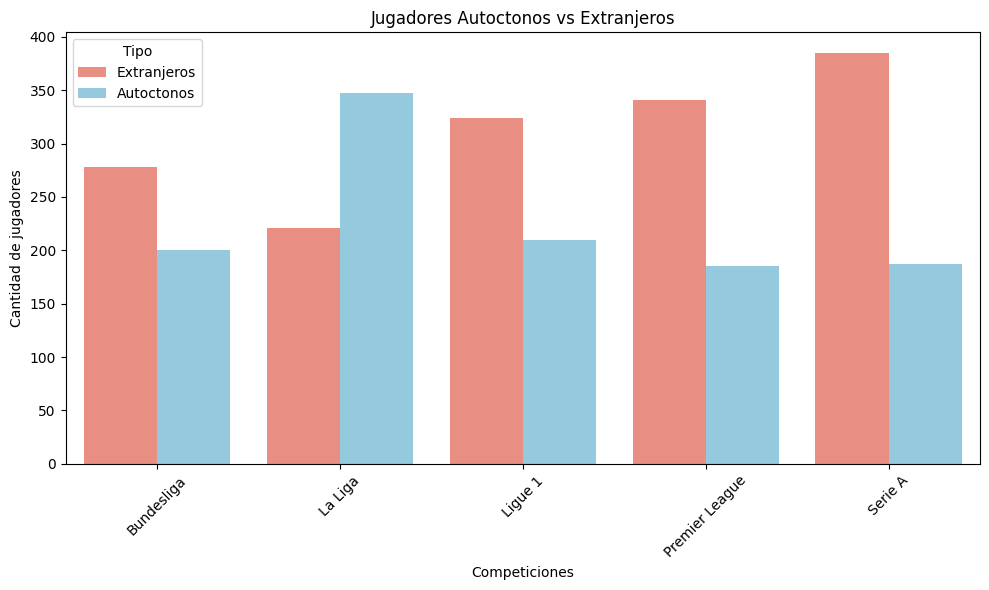

In [ ]:

# Grafico del tipo de jugadores

df_melt = df_resultado.melt(id_vars='Competicion',value_name='Cantidad',var_name='Tipo')
plt.figure(figsize=(10,6))
sns.barplot(data=df_melt, x='Competicion', y='Cantidad', hue='Tipo', palette=['salmon', 'skyblue'])
plt.title('Jugadores Autoctonos vs Extranjeros')
plt.ylabel('Cantidad de jugadores')
plt.xlabel('Competiciones')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
#Conteo de nacionalidades extranjeras en cada liga

extranjeros = df[df['Es_autoctono'] == False] 
nacionalidades_diferentes = extranjeros.groupby('Competicion')['Nacionalidad'].nunique()

extranjeros

,Jugador,Nacionalidad,Posicion,Equipo,Competicion,Edad,Partidos jugados,Minutos jugados,Titularidades,Goles,...,Penales convertidos,Penales ejecutados,Entradas (tackles),Tarjetas amarillas,Tarjetas rojas,Regates exitosos,Pases completados,Intercepciones,Nac_Esperada,Es_autoctono
0,Max Aarons,eng ENG,"DF,MF",Valencia,La Liga,25.0,2,104,1,0,...,0,0,3,1,0,1,29,0,es ESP,False
2,James Abankwah,ie IRL,"DF,MF",Udinese,Serie A,21.0,6,88,0,0,...,0,0,4,1,0,0,36,1,it ITA,False
4,Yunis Abdelhamid,ma MAR,DF,Saint-Étienne,Ligue 1,37.0,15,988,11,0,...,0,0,17,2,0,3,438,13,fr FRA,False
5,Himad Abdelli,dz ALG,"MF,FW",Angers,Ligue 1,25.0,31,2752,31,6,...,3,4,47,4,0,56,1322,25,fr FRA,False
6,Mohamed Abdelmoneim,eg EGY,DF,Nice,Ligue 1,26.0,12,855,10,0,...,0,0,21,2,0,1,471,15,fr FRA,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2671,Yanis Zouaoui,dz ALG,"DF,FW",Le Havre,Ligue 1,30.0,17,976,9,0,...,0,0,20,3,0,13,408,8,fr FRA,False
2674,Edhy Zuliani,it ITA,DF,Toulouse,Ligue 1,20.0,1,9,0,0,...,0,0,0,0,0,0,2,1,fr FRA,False
2675,Szymon Żurkowski,pl POL,MF,Empoli,Serie A,27.0,5,106,0,0,...,0,0,6,0,0,2,27,1,it ITA,False
2676,Martin Ødegaard,no NOR,MF,Arsenal,Premier League,26.0,28,2220,25,2,...,1,1,19,4,0,23,1188,5,eng ENG,False


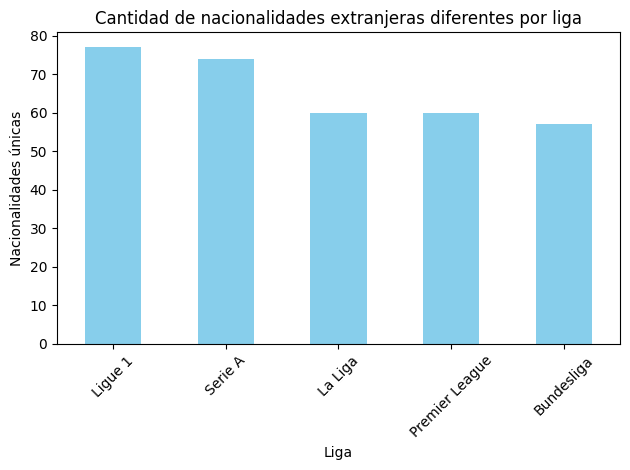

In [ ]:
#Grafico de la cantidad de nacionalidades diferentes por liga

nacionalidades_diferentes.sort_values(ascending=False).plot(
    kind='bar',
    title='Cantidad de nacionalidades extranjeras diferentes por liga',
    ylabel='Nacionalidades únicas',
    xlabel='Liga',
    color='skyblue'
)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Conteo de nacionalidad mas presente en cada liga

conteo = extranjeros.groupby(['Competicion', 'Nacionalidad']).size().reset_index(name='Cantidad')

mayor_nacionalidad = conteo.sort_values(['Competicion', 'Cantidad'], ascending=[True, False]) \
    .groupby('Competicion').first().reset_index()
mayor_nacionalidad.columns = ['Competicion', 'Nacionalidad_Mayoritaria', 'Cantidad_Jugadores']

mayor_nacionalidad

,Competicion,Nacionalidad_Mayoritaria,Cantidad_Jugadores
0,Bundesliga,fr FRA,35
1,La Liga,ar ARG,24
2,Ligue 1,ci CIV,25
3,Premier League,br BRA,33
4,Serie A,fr FRA,38


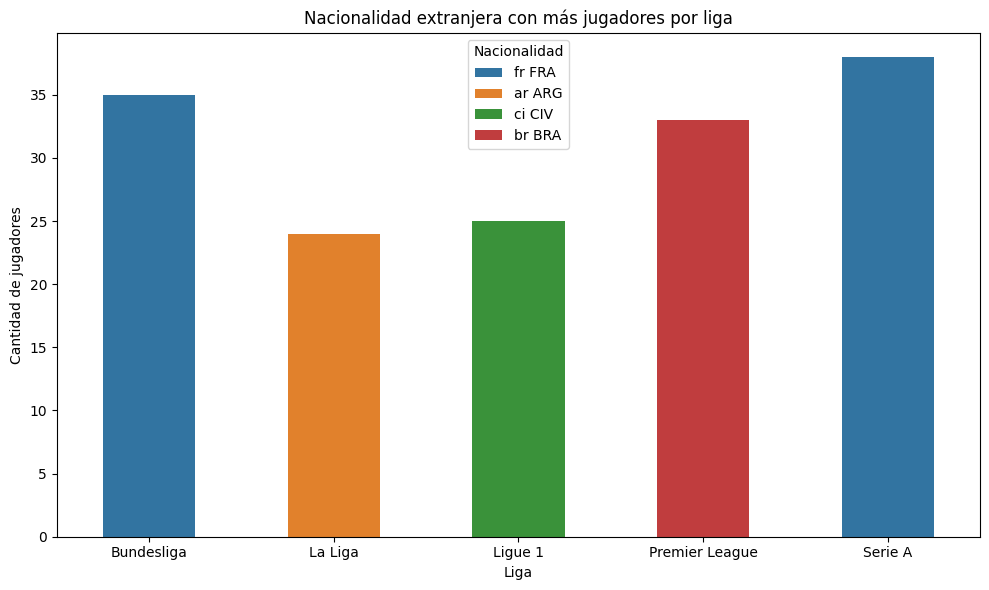

In [ ]:
# Grafico de la nacionalidad mas presente por liga

plt.figure(figsize=(10, 6))
sns.barplot(data=mayor_nacionalidad,x='Competicion', y='Cantidad_Jugadores',hue='Nacionalidad_Mayoritaria',width=0.5)
plt.title('Nacionalidad extranjera con más jugadores por liga')
plt.xlabel('Liga')
plt.ylabel('Cantidad de jugadores')
plt.legend(title='Nacionalidad')
plt.tight_layout()
plt.show()


In [16]:
#Conteo de jugadores mayores y menores de 25 años (extranjeros)

menores_25 = extranjeros[extranjeros['Edad'] < 25]
mayores_25 = extranjeros[extranjeros['Edad'] >= 25]
cantidad_menores_25 = menores_25.groupby('Competicion').size()
cantidad_mayores_25 = mayores_25.groupby('Competicion').size()
cantidad_jugadores_extranjeros = pd.DataFrame({
    'Menores de 25': cantidad_menores_25,
    'Mayores de 25': cantidad_mayores_25
})
cantidad_jugadores_extranjeros

,Menores de 25,Mayores de 25
Competicion,,
Bundesliga,110,168
La Liga,62,158
Ligue 1,144,179
Premier League,123,215
Serie A,148,237


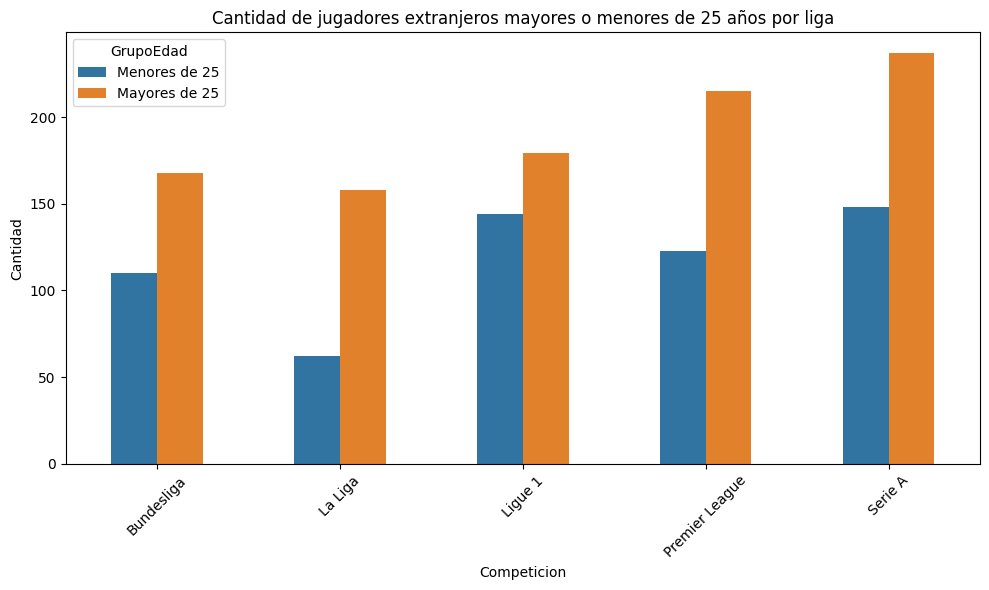

In [17]:
#Grafico de jugadores mayores y menores de 25 años por liga (extranjeros)

df_cantidad = cantidad_jugadores_extranjeros.reset_index().melt(id_vars='Competicion',var_name='GrupoEdad',value_name='Cantidad')
plt.figure(figsize=(10,6))
sns.barplot(data=df_cantidad, x='Competicion', y='Cantidad', hue='GrupoEdad', width=0.5 )
plt.title('Cantidad de jugadores extranjeros mayores o menores de 25 años por liga')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [19]:
# Conteo de jugadores mayores y menores de 25 años (autóctonos)

autoctonos = df[df['Es_autoctono'] == True]

menores_25_autoctonos = autoctonos[autoctonos['Edad'] < 25]
mayores_25_autoctonos = autoctonos[autoctonos['Edad'] >= 25]

cantidad_menores_25_autoctonos = menores_25_autoctonos.groupby('Competicion').size()
cantidad_mayores_25_autoctonos = mayores_25_autoctonos.groupby('Competicion').size()

cantidad_jugadores_autoctonos = pd.DataFrame({
    'Menores de 25': cantidad_menores_25_autoctonos,
    'Mayores de 25': cantidad_mayores_25_autoctonos
})

cantidad_jugadores_autoctonos

,Menores de 25,Mayores de 25
Competicion,,
Bundesliga,73,125
La Liga,160,187
Ligue 1,125,85
Premier League,86,99
Serie A,74,113


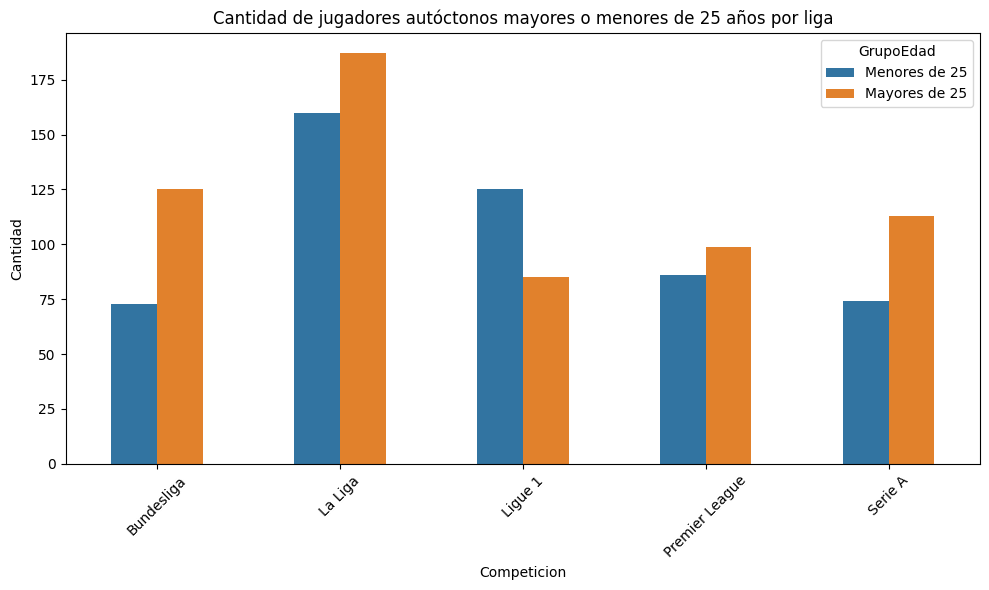

In [20]:
# Gráfico de jugadores mayores y menores de 25 años por liga (autóctonos)

df_cantidad_autoctonos = cantidad_jugadores_autoctonos.reset_index().melt(
    id_vars='Competicion',
    var_name='GrupoEdad',
    value_name='Cantidad'
)

plt.figure(figsize=(10,6))
sns.barplot(data=df_cantidad_autoctonos, x='Competicion', y='Cantidad', hue='GrupoEdad', width=0.5)
plt.title('Cantidad de jugadores autóctonos mayores o menores de 25 años por liga')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#Edad promedio de los jugadores extranjeros

edad_promedio_extranjeros = extranjeros.groupby('Competicion')['Edad'].mean()
edad_promedio_extranjeros

Competicion
Bundesliga        25.679856
La Liga           27.095455
Ligue 1           25.479876
Premier League    26.263314
Serie A           26.153247
Name: Edad, dtype: float64

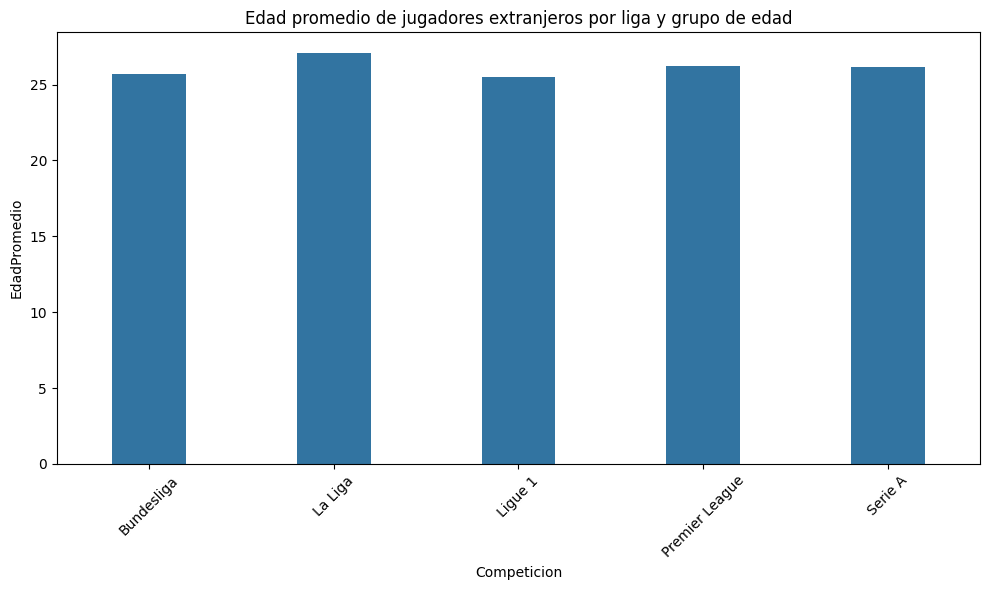

In [22]:
#Grafico de edad promedio de jugadores extranjeros por liga
df_promedio = edad_promedio_extranjeros.reset_index().melt(id_vars='Competicion',var_name='GrupoEdad',
        value_name='EdadPromedio')
plt.figure(figsize=(10,6))
sns.barplot(data=df_promedio, x='Competicion', y='EdadPromedio',width=0.4)
plt.title('Edad promedio de jugadores extranjeros por liga y grupo de edad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
  

In [ ]:
# Edad promedio de los jugadores autóctonos

edad_promedio_autoctonos = autoctonos.groupby('Competicion')['Edad'].mean()
edad_promedio_autoctonos

Competicion
Bundesliga        26.474747
La Liga           25.812680
Ligue 1           24.085714
Premier League    25.524324
Serie A           26.053476
Name: Edad, dtype: float64

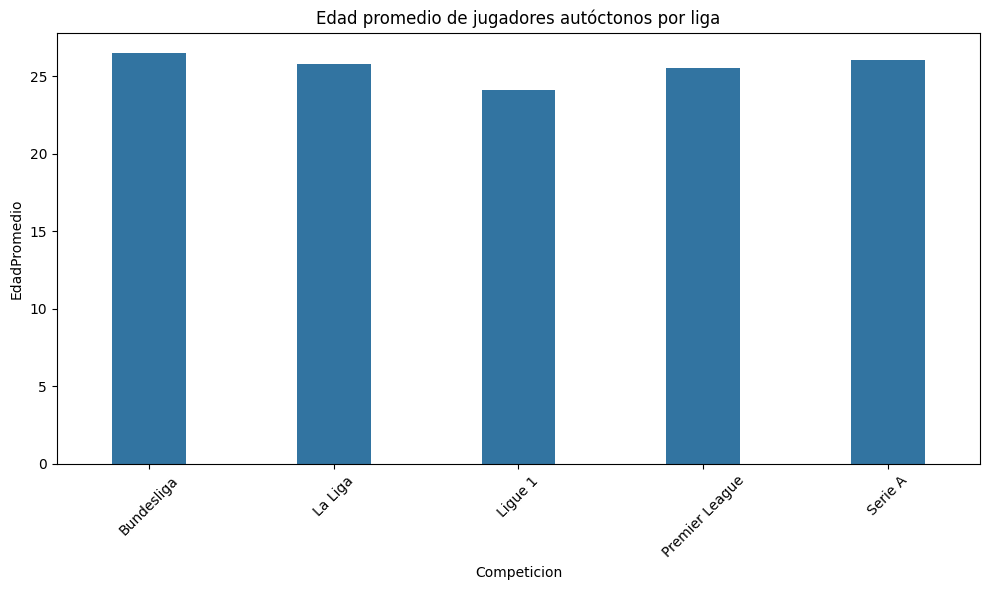

In [23]:
# Gráfico de edad promedio de jugadores autóctonos por liga

df_promedio_autoctonos = edad_promedio_autoctonos.reset_index()
df_promedio_autoctonos.columns = ['Competicion', 'EdadPromedio']

plt.figure(figsize=(10,6))
sns.barplot(data=df_promedio_autoctonos, x='Competicion', y='EdadPromedio', width=0.4)
plt.title('Edad promedio de jugadores autóctonos por liga')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [34]:
#Comparación general de la edad promedio entre jugadores extranjeros y autóctonos

promedio_general_extranjeros = edad_promedio_extranjeros.mean()
promedio_general_autoctonos = edad_promedio_autoctonos.mean()
df_promedios_generales = pd.DataFrame({
    'Grupo': ['Extranjeros', 'Autoctonos'],
    'EdadPromedio': [promedio_general_extranjeros, promedio_general_autoctonos]
}).round(2)
df_promedios_generales

,Grupo,EdadPromedio
0,Extranjeros,26.13
1,Autoctonos,25.59


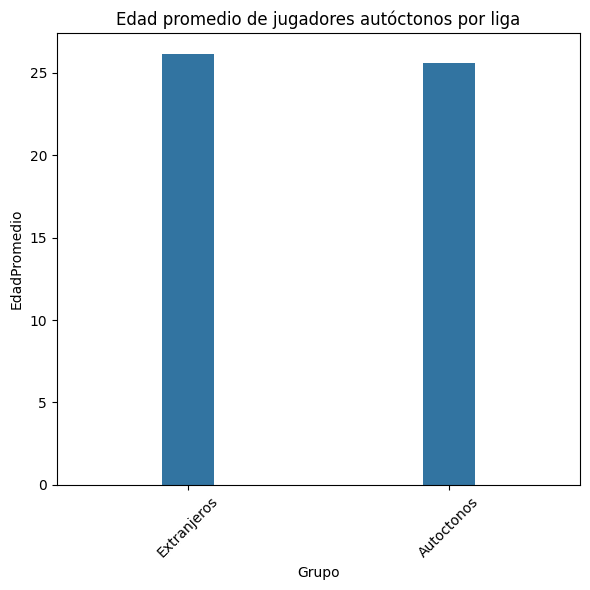

In [35]:
#Grafico de edad promedio 


plt.figure(figsize=(6,6))
sns.barplot(data=df_promedios_generales, x='Grupo', y='EdadPromedio', width=0.2)
plt.title('Edad promedio de jugadores autóctonos por liga')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
#Exporto df csv con columnas nuevas 

df.to_csv("../data/Datos_Jugadores_2024-2025_ampliado.csv", index=False)